#Trabajo Parcial

In [10]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 260, done.
remote: Counting objects: 100% (260/260), done.
remote: Compressing objects: 100% (255/255), done.
remote: Total 260 (delta 144), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (260/260), 270.98 KiB | 6.77 MiB/s, done.
Resolving deltas: 100% (144/144), done.


In [11]:
from algorithmic_complexity.aclib import graphstuff as gs

In [12]:
import pandas as pd
import numpy as np
import networkx as nx
import math
import heapq as hq

## Lectura del *dataset*

In [13]:
url="https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/poblaciones.csv"
poblacionesDF = pd.read_csv(url)

In [17]:
def dist(cp1, cp2):
  x1, y1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
  x2, y2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])

  return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

### Generando grafo de centros poblados

In [21]:
def generateG(nom_provincia, nom_distrito, poblacionesDF):
  nomprovincias = poblacionesDF['PROVINCIA'].unique()
  provincias = dict()

  for nom in nomprovincias:
    provincias[nom] = poblacionesDF[poblacionesDF['PROVINCIA'] == nom]
  
  nomdistritos = provincias[nom_provincia]['DISTRITO'].unique()
  
  distritos = dict()
  for nom in nomdistritos:
    distritos[nom] = provincias[nom_provincia][provincias[nom_provincia]['DISTRITO'] == nom]

  distrito = distritos[nom_distrito]
  G = nx.Graph()
  col = 'CENTRO POBLADO'
  for i, cp1 in distrito.iterrows():
    for j, cp2 in distrito.iterrows():
      if cp1[col] != cp2[col]:
        G.add_edge(cp1[col], cp2[col], weight=dist(cp1, cp2),label='a')

  return G

## Ingresar datos de prueba

In [32]:
#@title Provincia 
#@markdown Ingrese la provincia

no_type_checking = ''
nom_provincia = 'SULLANA' #@param {type:"string"}
nom_distrito = 'MARCAVELICA' #@param {type:"string"}

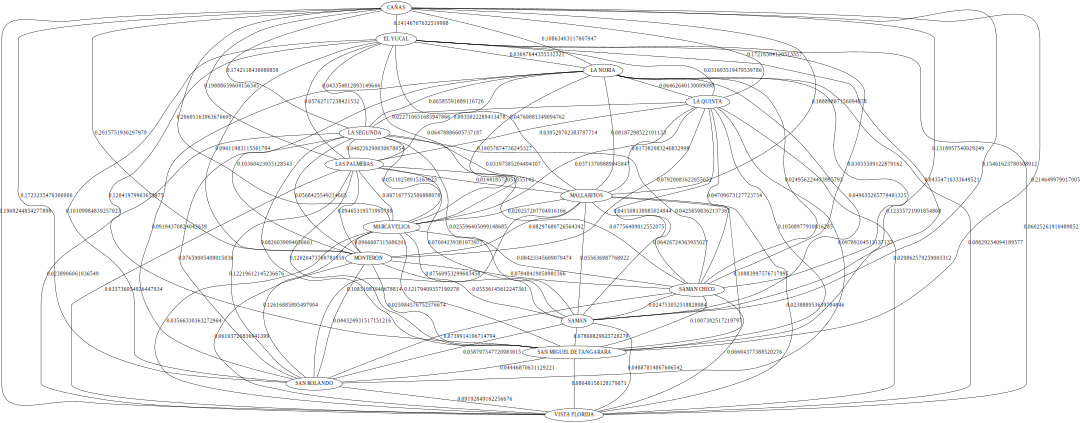

In [33]:
G = generateG(nom_provincia, nom_distrito, poblacionesDF)
gs.nx2gv(G, weighted=True, params={'size':'15'})

# Traveling Salesman Problem

### Función que busca el mínimo recorrido comenzando de un centro poblado escogido

#### Recorriendo el grafo con el algoritmo de dijkstra


In [25]:
def dijkstra(G, s):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['path']    = -1
    G.nodes[u]['cost']    = math.inf

  G.nodes[s]['cost'] = 0
  solution = []
  solution.append(s)
  cost = 0
  q = [(0, s)]
  while q:
    g_u, u = hq.heappop(q)
    if not G.nodes[u]['visited']:
      G.nodes[u]['visited'] = True
      for v in G.neighbors(u):
        if not G.nodes[v]['visited']:
          w_uv = G.edges[u, v]['weight']
          f_v  = g_u + w_uv
          g_v  = G.nodes[v]['cost']
          if f_v < g_v:
            G.nodes[v]['cost'] = f_v
            solution.append(v)
            cost += f_v
            hq.heappush(q, (f_v, v))

  cost +=  G.edges[solution[-1], s]['weight'] #regresar al inicio
  solution.append(s)

  return cost, solution

### Enviar todos los centros poblados y escoger el minimo recorrido

In [26]:
def algoritm_TSP(G):
  min = math.inf
  path = []
  for v in G.nodes:
    c,sol = dijkstra(G,v)
    if c<min:
      min = c
      path = sol

  #return min, path
  print("En el distrito de: ",nom_distrito," la mínima distancia de recorrido para pasar por todos los centros poblados es de: ", end ="")
  print(min)
  print("El recorrido a seguir es: ")
  for i in range(len(path)):
    if i == len(path)-1:
      print(path[i])
    else:
      print(path[i], " --> ",end="")



In [34]:
algoritm_TSP(G)

En el distrito de:  MARCAVELICA  la mínima distancia de recorrido para pasar por todos los centros poblados es de: 0.7674380777310152
El recorrido a seguir es: 
LA SEGUNDA  --> CAÑAS  --> EL YUCAL  --> LA NORIA  --> LA QUINTA  --> LAS PALMERAS  --> MALLARITOS  --> MARCAVELICA  --> MONTERON  --> SAMAN CHICO  --> SAMAN  --> SAN MIGUEL DE TANGARARA  --> SAN ROLANDO  --> VISTA FLORIDA  --> LA SEGUNDA
